x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


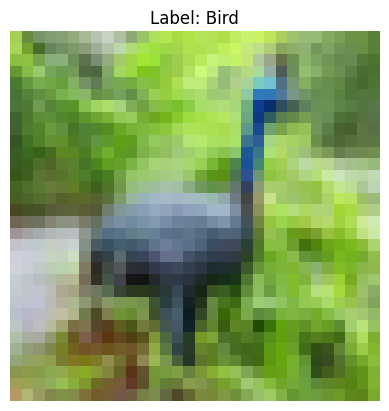

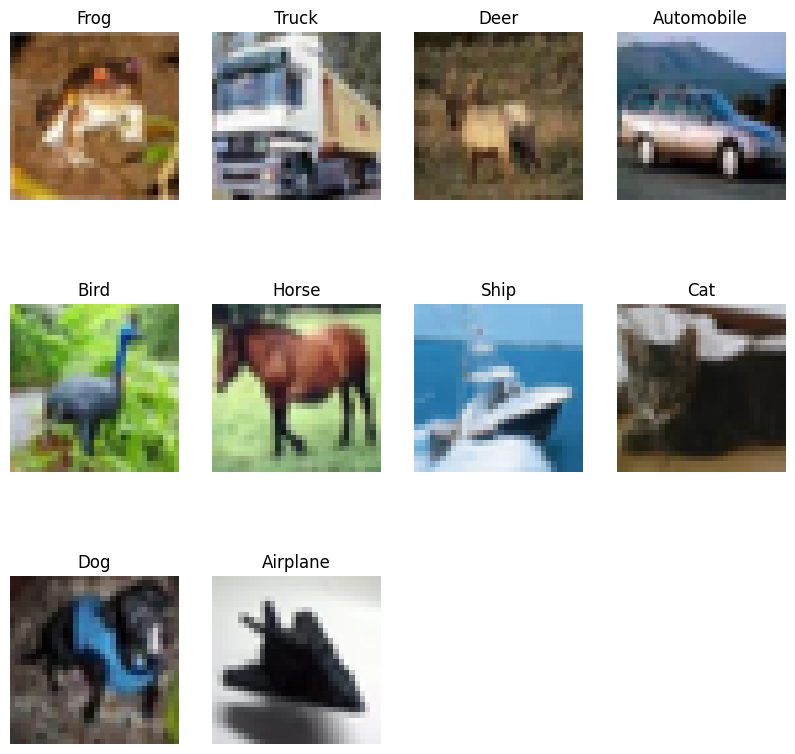

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.3418 - loss: 1.7842 - val_accuracy: 0.5138 - val_loss: 1.3233
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.5597 - loss: 1.2362 - val_accuracy: 0.5967 - val_loss: 1.1380
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6239 - loss: 1.0636 - val_accuracy: 0.6346 - val_loss: 1.0417
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6653 - loss: 0.9471 - val_accuracy: 0.6616 - val_loss: 0.9761
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6989 - loss: 0.8646 - val_accuracy: 0.6800 - val_loss: 0.9318
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7179 - loss: 0.8018 - val_accuracy: 0.6904 - val_loss: 0.9047
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7353 - loss: 0.7526 - val_accuracy: 0.6910 - val_loss: 0.9049
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7495 -

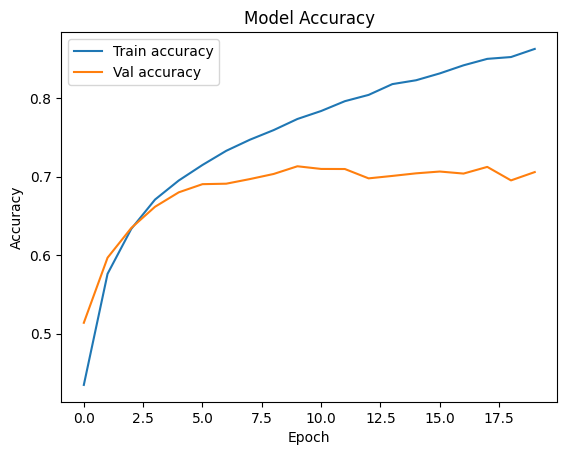

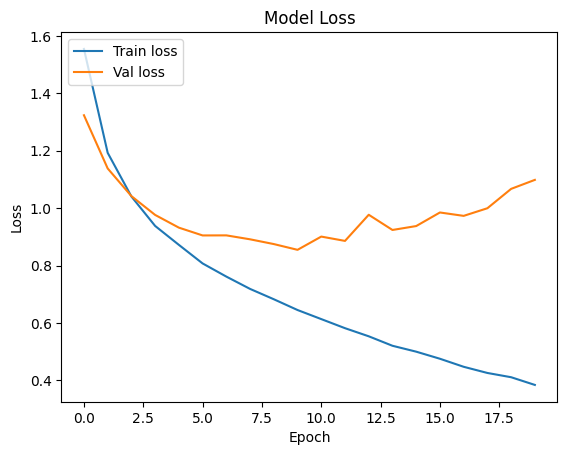

Test Accuracy: 70.58%
Test Loss: 1.0982
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


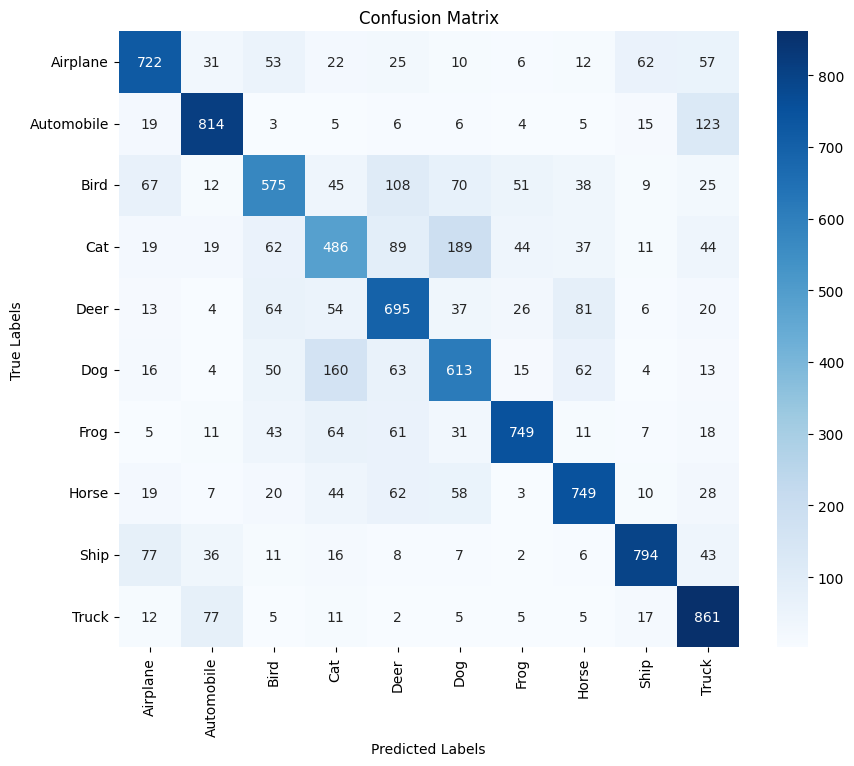

Classification Report:

              precision    recall  f1-score   support

    Airplane       0.75      0.72      0.73      1000
  Automobile       0.80      0.81      0.81      1000
        Bird       0.65      0.57      0.61      1000
         Cat       0.54      0.49      0.51      1000
        Deer       0.62      0.69      0.66      1000
         Dog       0.60      0.61      0.61      1000
        Frog       0.83      0.75      0.79      1000
       Horse       0.74      0.75      0.75      1000
        Ship       0.85      0.79      0.82      1000
       Truck       0.70      0.86      0.77      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.70     10000
weighted avg       0.71      0.71      0.70     10000



In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Load and preprocess CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Define class names for CIFAR-10 dataset
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Display a sample image
plt.imshow(x_train[6])
plt.title(f'Label: {class_names[y_train[6][0]]}')
plt.axis('off')
plt.show()

# Function to display one example per class
def plot_images_by_class(images, labels, class_names, num_classes=10):
    class_examples = {}
    for i, label in enumerate(labels):
        label_idx = label[0]
        if label_idx not in class_examples:
            class_examples[label_idx] = images[i]
        if len(class_examples) == num_classes:
            break

    plt.figure(figsize=(10, 10))
    for i, (label_idx, img) in enumerate(class_examples.items()):
        plt.subplot(3, 4, i + 1)
        plt.imshow(img)
        plt.title(class_names[label_idx])
        plt.axis('off')
    plt.show()

# Display one example per class
plot_images_by_class(x_train, y_train, class_names)

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes in CIFAR-10
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Plot accuracy and loss
for metric in ['accuracy', 'loss']:
    plt.plot(history.history[metric], label=f'Train {metric}')
    plt.plot(history.history[f'val_{metric}'], label=f'Val {metric}')
    plt.title(f'Model {metric.capitalize()}')
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.legend(loc='upper left')
    plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

# Generate predictions and calculate confusion matrix
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()  # Flatten y_test to match the shape of y_pred_classes

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))
